In [1]:
import importlib

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from pytelpoint.fitting import azel_fit, best_fit_pars
from pytelpoint.visualization import plot_corner, pointing_azel_resid, pointing_histogram, pointing_residuals, pointing_sky
from pytelpoint.io import read_azel_datfile, read_raw_datfile
from pytelpoint.transform import azel_model

%load_ext autoreload
%autoreload 2

In [ ]:
# this is the K&E pointing run data from august 2021
TEST_DATA = importlib.resources.files("pytelpoint") / "test_data"
datafile = TEST_DATA / "k_and_e.dat"
coo_ref, coo_meas = read_azel_datfile(datafile)
idata = azel_fit(coo_ref, coo_meas, ntune=500, nsamp=1000, cores=8) # , fit_terms=['ia', 'ie'], fixed_terms={})
#     'an': 2.47417625,
#     'aw': -10.41301937,
#     'ca': -6.96307427,
#     'npae': -2.6429775,
#     'tf': 21.43400213,
#     'tx': -2.70606889
#     }
# )

In [ ]:
truths = {
    'ia': 1209.2612,
    'ie': -2.9933,
    'npae': -3.4724,
    'ca': -5.9455,
    'an': 2.4950,
    'aw': -10.3347,
    'tf': 21.4118,
    'tx': -2.7165
}
f = plot_corner(idata, truths=truths, title_kwargs={"fontsize": 16})
f.savefig("k_and_e_corner.pdf")

In [ ]:
pars = best_fit_pars(idata)
pars

In [ ]:
mc_coo = azel_model(coo_meas, **pars)

In [ ]:
f = pointing_residuals(coo_ref, mc_coo, circle_size=1.0)
f.savefig("k_and_e_resid.pdf")

In [ ]:
f = pointing_azel_resid(coo_ref, mc_coo)
f.savefig("k_and_e_azel.pdf")

In [ ]:
f = pointing_histogram(coo_ref, mc_coo, bins='freedman')
f.savefig("k_and_e_hist.pdf")

In [ ]:
f = pointing_sky(coo_ref, mc_coo)
f.savefig("k_and_e_sky.pdf")

In [2]:
# this is a binospec pointing from 20250326
bino_ref, bino_meas = read_raw_datfile("point_20250326.dat")

In [3]:
bino_idata = azel_fit(bino_ref, bino_meas, cores=8)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [ia, ie, an, aw, ca, npae, tf, tx, az_sigma, el_sigma]


Output()

Sampling 8 chains for 500 tune and 2_000 draw iterations (4_000 + 16_000 draws total) took 34 seconds.


In [4]:
bino_pars = best_fit_pars(bino_idata)
bino_pars

{'ia': np.float64(1206.4478564),
 'ie': np.float64(3.95692716),
 'an': np.float64(-0.50205211),
 'aw': np.float64(-12.22987334),
 'ca': np.float64(3.25542048),
 'npae': np.float64(-5.02133024),
 'tf': np.float64(1.75999881),
 'tx': np.float64(-1.92235887),
 'az_sigma': np.float64(1.3025138),
 'el_sigma': np.float64(0.82401727)}

In [5]:
bino_coo = azel_model(bino_meas, **bino_pars)

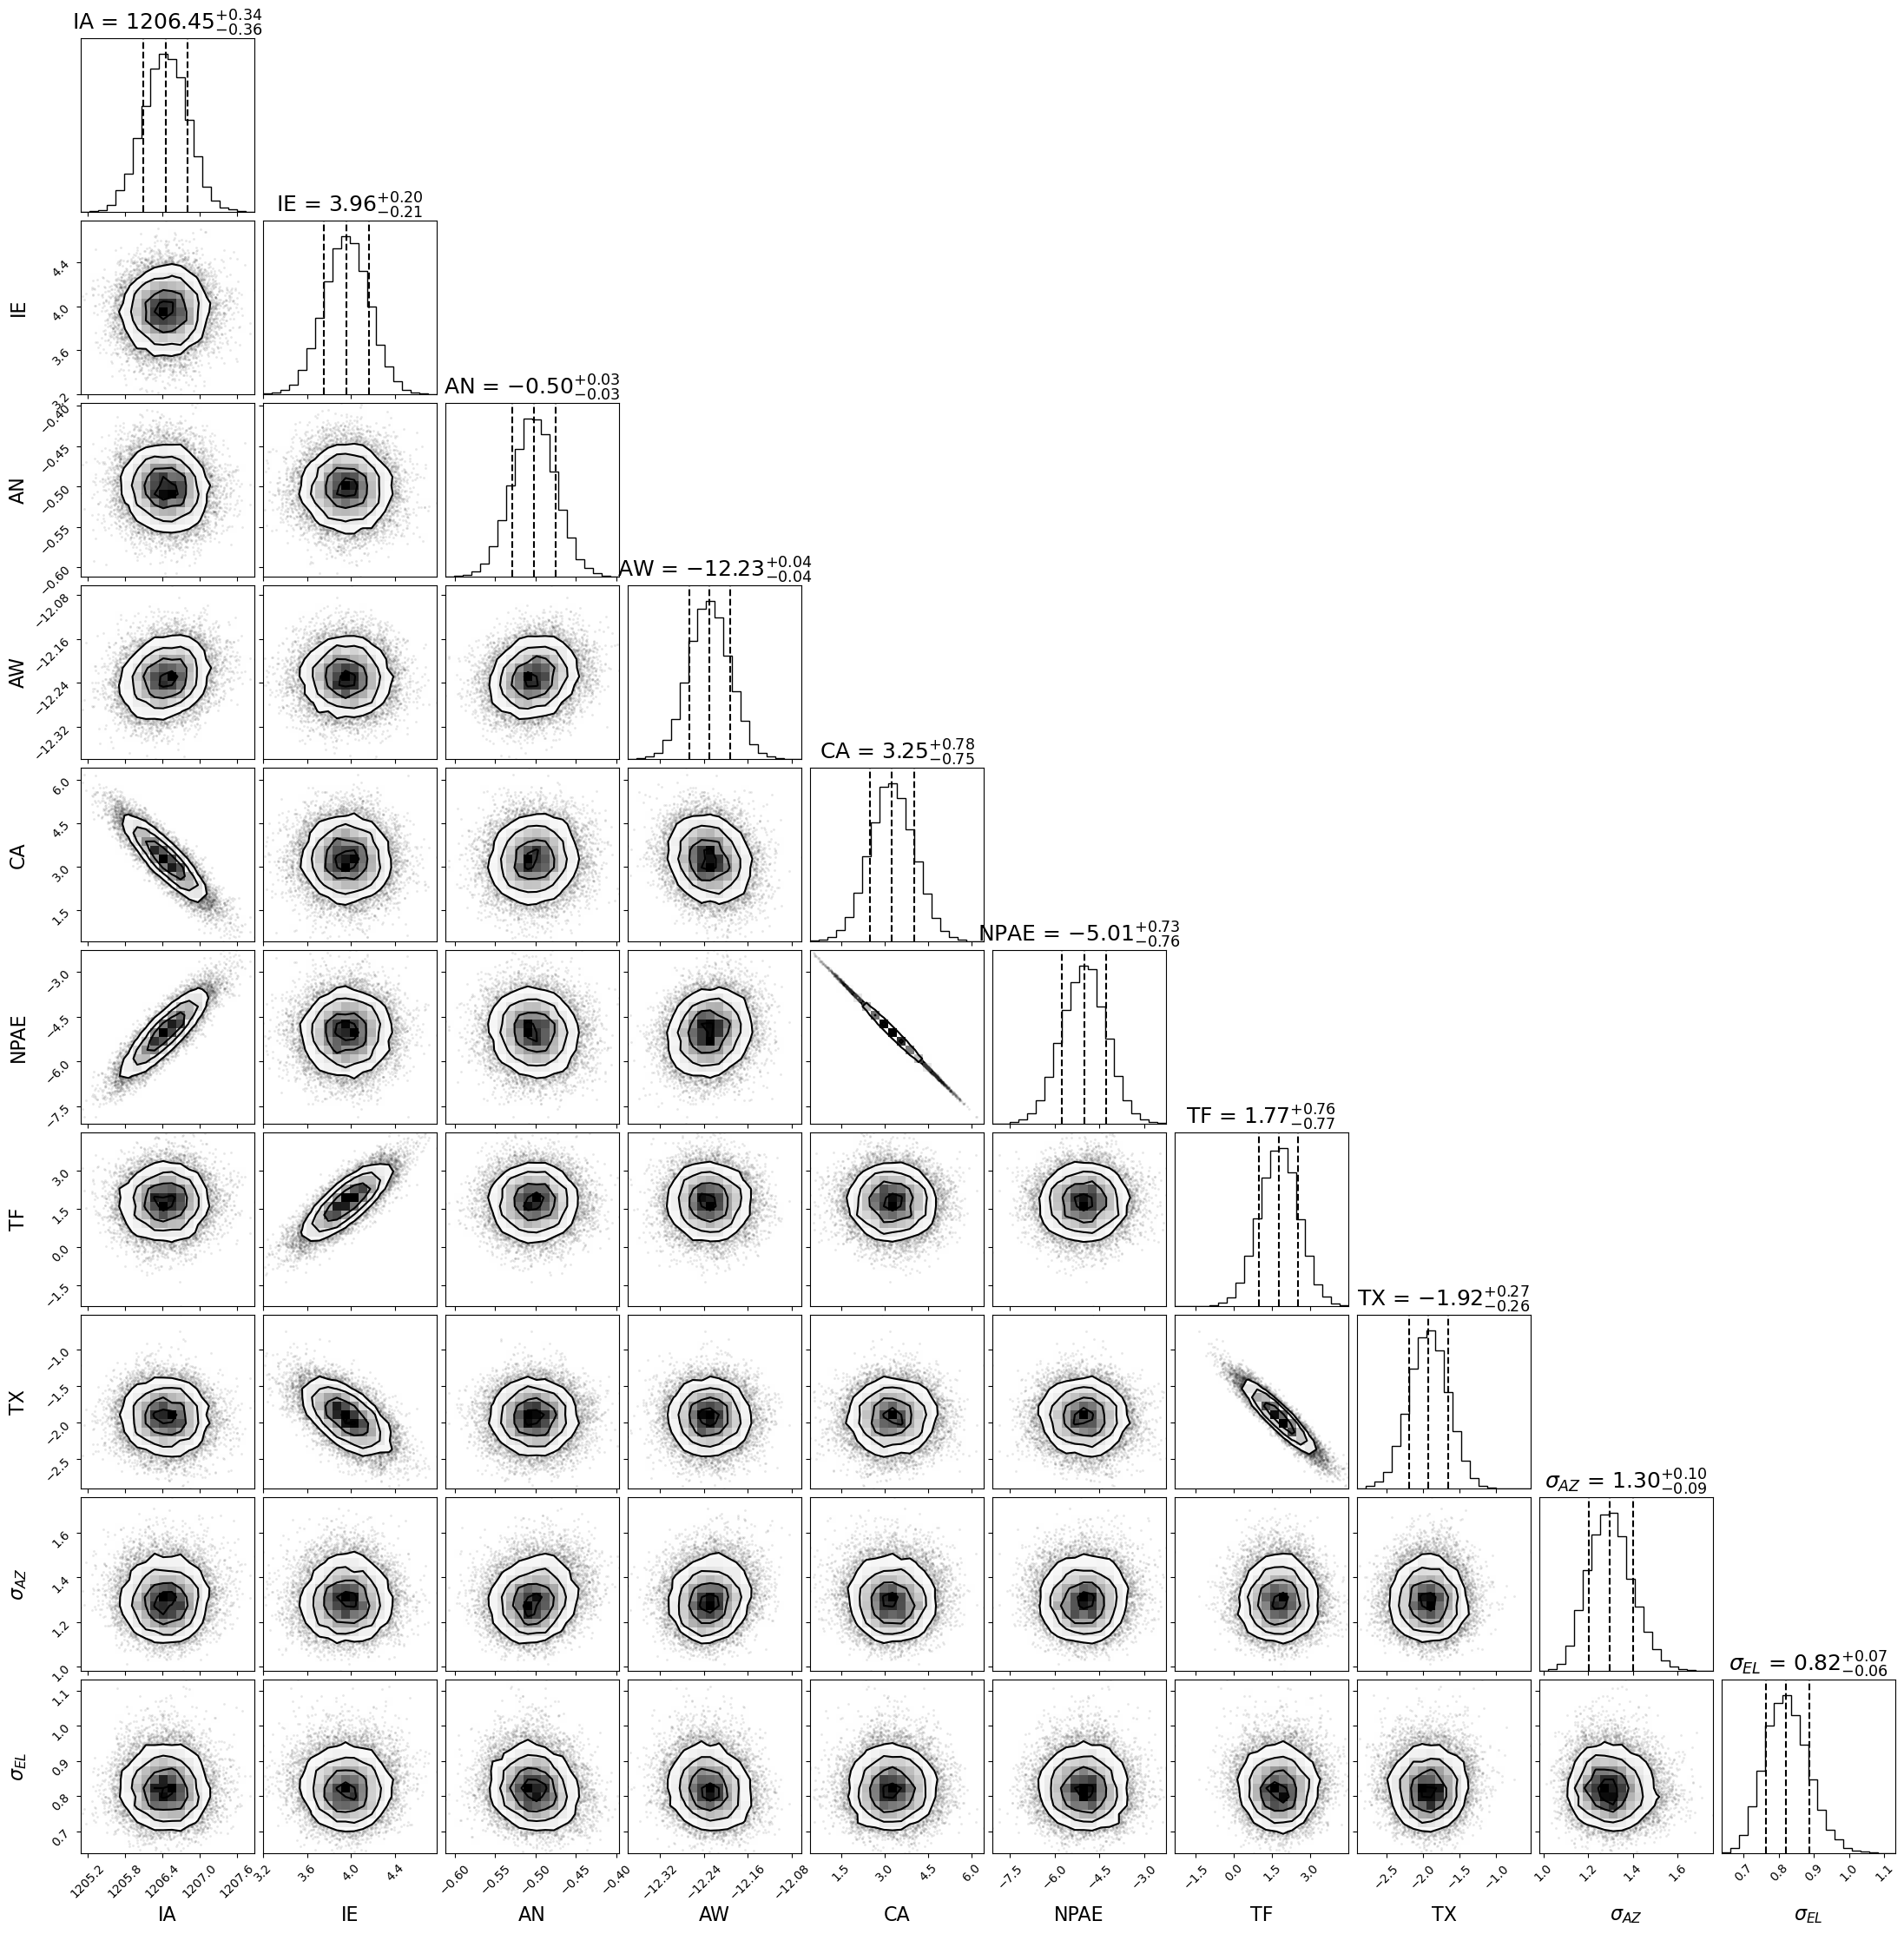

In [7]:
f = plot_corner(bino_idata)
f.savefig("bino_corner_20250326.png")
f.savefig("bino_corner_20250326.pdf")

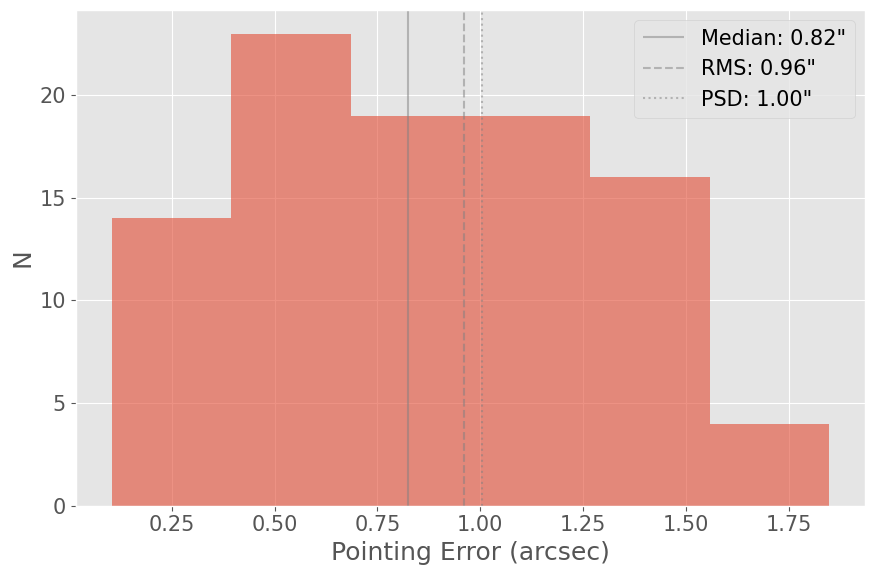

In [9]:
f = pointing_histogram(bino_ref, bino_coo)
f.savefig("bino_hist_20250326.png")
f.savefig("bino_hist_20250326.pdf")

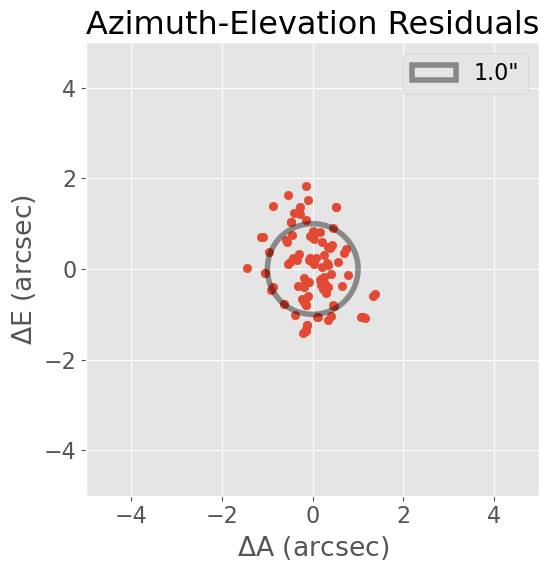

In [11]:
f = pointing_residuals(bino_ref, bino_coo)
f.savefig("bino_resid_20250326.png")
f.savefig("bino_resid_20250326.pdf")

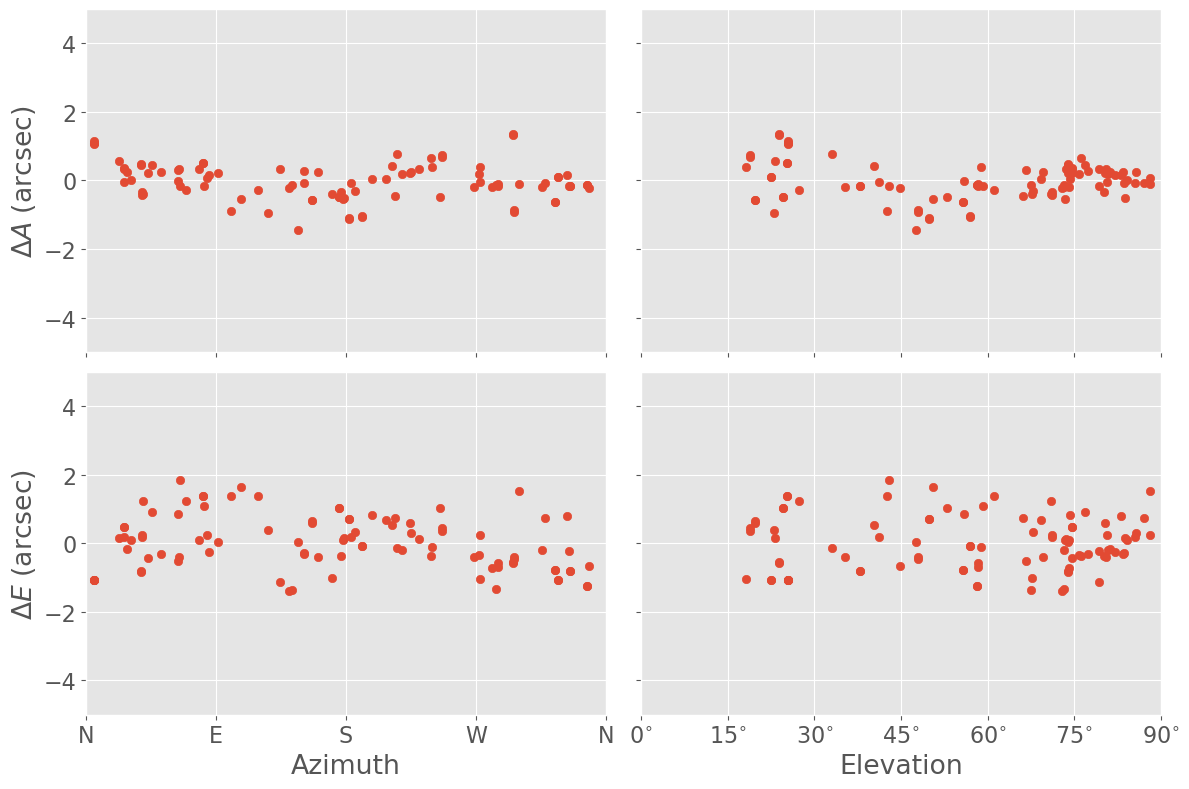

In [13]:
f = pointing_azel_resid(bino_ref, bino_coo)
f.savefig("bino_azel_20250326.png")
f.savefig("bino_azel_20250326.pdf")

In [ ]:
# this is the f/5 hecto pointing run done in november 2021
# f5_ref, f5_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20211129/point.dat")
f5_ref, f5_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20211212/point_20211212.dat")

In [ ]:
f5_idata = azel_fit(f5_ref, f5_meas)

In [ ]:
f5_pars = best_fit_pars(f5_idata)
f5_pars

In [ ]:
f5_coo = azel_model(f5_meas, **f5_pars)

In [ ]:
f = plot_corner(f5_idata)

In [ ]:
f = pointing_histogram(f5_ref, f5_coo)

In [ ]:
f = pointing_residuals(f5_ref, f5_coo)

In [ ]:
# this shows the need for better sampling of stars across elevation
f = pointing_azel_resid(f5_ref, f5_coo)

In [ ]:
# this is the old K&E 0th order pointing data taken back in march of 2003
oldke_ref, oldke_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20030320/pointing_3_20_2003")

In [ ]:
oldke_idata = azel_fit(oldke_ref, oldke_meas)
oldke_pars = best_fit_pars(oldke_idata)

In [ ]:
oldke_pars, pars

In [ ]:
f = plot_corner(oldke_idata)

In [ ]:
oldke_coo = azel_model(oldke_meas, **oldke_pars)

In [ ]:
# the az and el dispersions are almost twice as large here as in other pointing runs. i think the stars
# were centered by eye visually in the K&E. the camera used for the 2021 K&E run makes a significant difference.
f = pointing_residuals(oldke_ref, oldke_coo)

In [ ]:
f = pointing_histogram(oldke_ref, oldke_coo)